In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import spacy
from spacy.tokenizer import Tokenizer
import re
import nltk
import tensorflow.keras
import keras
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
layers = keras.layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
#from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Exploration

In [3]:
train = train[:20000]
test = test[:15000]
# test = train[60000:74000]

In [4]:
train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,3895911,Apartment,Private room,"{TV,""Cable TV"",Kitchen,""Free parking on premis...",2,1.0,Real Bed,flexible,True,LA,...,34.028372,-118.494449,Santa Monica Private Bedroom/Bathroom Suite,Santa Monica,6,97.0,https://a0.muscache.com/im/pictures/92355eae-b...,90403,1.0,1.0
1,9710289,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",3,1.0,Real Bed,moderate,True,NYC,...,40.720380,-73.942329,"Bright, charming luxury 1 BR with amazing rooftop",Williamsburg,2,80.0,https://a0.muscache.com/im/pictures/da03e413-d...,11222,1.0,1.0
2,9051635,Apartment,Private room,"{""Wireless Internet"",Kitchen,Heating,""Family/k...",1,1.0,Real Bed,moderate,True,SF,...,37.785434,-122.470284,Private room in charming apartment,Richmond District,2,100.0,https://a0.muscache.com/im/pictures/0ba7d8aa-9...,94118,1.0,1.0
3,708374,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",1,1.0,Real Bed,strict,True,LA,...,33.976026,-118.463471,Marina del Rey Beach Jr 1 Bdrm 5,Marina Del Rey,7,94.0,https://a0.muscache.com/im/pictures/30279741/4...,90292,0.0,1.0
4,626296,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,flexible,True,NYC,...,40.735573,-74.005996,Bright Studio Loft Prime Location,West Village,0,NaN,https://a0.muscache.com/im/pictures/9384e262-8...,10014,1.0,1.0


In [6]:
train.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [7]:
train.shape

(20000, 29)

In [8]:
train.isnull().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   61
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              4289
host_has_profile_pic        57
host_identity_verified      57
host_response_rate        4978
host_since                  57
instant_bookable             0
last_review               4279
latitude                     0
longitude                    0
name                         0
neighbourhood             1793
number_of_reviews            0
review_scores_rating      4515
thumbnail_url             2265
zipcode                    243
bedrooms                    20
beds                        36
dtype: int64

In [9]:
train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,2.000000e+04,20000.000000,20000.000000,19939.000000,20000.000000,20000.000000,20000.000000,15485.000000,19980.000000,19964.000000
mean,1.124227e+07,4.782304,3.153050,1.234741,38.445588,-92.487212,20.853750,94.068195,1.260460,1.707473
std,6.084262e+06,0.716564,2.157813,0.586638,3.074681,21.762255,37.943746,7.973364,0.845979,1.245613
min,2.732000e+03,0.000000,1.000000,0.000000,33.339327,-122.510905,0.000000,20.000000,0.000000,0.000000
25%,6.208778e+06,4.317488,2.000000,1.000000,34.129272,-118.344217,1.000000,92.000000,1.000000,1.000000
50%,1.227269e+07,4.709530,2.000000,1.000000,40.663026,-76.995551,6.000000,96.000000,1.000000,1.000000
75%,1.639416e+07,5.220356,4.000000,1.000000,40.745717,-73.954220,23.000000,100.000000,1.000000,2.000000
max,2.122746e+07,7.600402,16.000000,8.000000,42.390437,-70.991861,542.000000,100.000000,10.000000,16.000000


In [10]:
train['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt'], dtype=object)

## Cleaning

In [11]:
def clean(df):
    """ 
    Cleans the dataset
    """

    # encode binary columns
    df['host_has_profile_pic'][df['host_has_profile_pic']=='t'] = 1
    df['host_has_profile_pic'][df['host_has_profile_pic']=='f'] = 0

    df['host_identity_verified'][df['host_identity_verified']=='t'] = 1
    df['host_identity_verified'][df['host_identity_verified']=='f'] = 0

    df['instant_bookable'][df['instant_bookable']=='t'] = 1
    df['instant_bookable'][df['instant_bookable']=='f'] = 0
    


    # Remove some of the unique property types
    df['property_type'][df['property_type'].isin(['Boutique hotel', 'Villa', 'Timeshare',
                                                    'In-law', 'Boat', 'Camper/RV', 'Castle', 'Cabin', 'Treehouse',
                                                    'Serviced apartment', 'Tipi', 'Hut', 'Vacation home', 'Tent',
                                                    'Chalet', 'Yurt', 'Earth House', 'Train', 'Cave', 'Guest suite', 'Dorm',
                                                    'Casa particular', 'Parking Space', 'Lighthouse', 'Island'])] = 'Other'
    
    # Creates price column that isnt in log form
#     e = 2.718281828
#     df['price'] = e ** df['log_price']
    
    # Drops useless columns 
    df = df.drop(['zipcode', 'thumbnail_url', 'host_response_rate',
                 'first_review', 'last_review', 'review_scores_rating', 'neighbourhood', 'id',
                 'longitude', 'latitude', 'host_since', 'name'], axis = 1)
    
    return df

In [12]:
# Applying clean function to both trian and test data
train = clean(train)
test = clean(test)

<ipython-input-11-1e92a452e819>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_has_profile_pic'][df['host_has_profile_pic']=='f'] = 0
<ipython-input-11-1e92a452e819>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_identity_verified'][df['host_identity_verified']=='f'] = 0
<ipython-input-11-1e92a452e819>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['instant_bookable'][df['instant_bookable']=='f'] = 0


In [13]:
# Creating price column and dropping log price column from training data
e = 2.718281828
train['price'] = e ** train['log_price']

train = train.drop(['log_price'], axis = 1)

In [14]:
train['beds'].unique()

array([ 1.,  3.,  2.,  7.,  4.,  6.,  5., nan, 10.,  8., 16.,  9., 13.,
       12., 11., 14., 15.,  0.])

In [15]:
train.isnull().sum()

property_type              0
room_type                  0
amenities                  0
accommodates               0
bathrooms                 61
bed_type                   0
cancellation_policy        0
cleaning_fee               0
city                       0
description                0
host_has_profile_pic      57
host_identity_verified    57
instant_bookable           0
number_of_reviews          0
bedrooms                  20
beds                      36
price                      0
dtype: int64

In [16]:
train.head(500)

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,bedrooms,beds,price
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",1,1,0,2,1.0,1.0,150.000000
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,1,0,1,6,3.0,3.0,169.000000
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,1,1,1,10,1.0,3.0,145.000000
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,1,1,0,0,2.0,2.0,749.999999
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",1,1,1,4,0.0,1.0,115.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Apartment,Entire home/apt,"{""Air conditioning"",Kitchen,Elevator,Heating,""...",4,1.0,Real Bed,flexible,False,NYC,"Alcove studio apt in Midtown Manhattan, 1 bloc...",1,0,0,0,0.0,1.0,176.000000
496,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,moderate,True,NYC,"Large, sun-drenched apartment in pre-war build...",1,0,0,12,1.0,1.0,110.000000
497,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,True,NYC,We live in the Bushwick neighborhood of Brookl...,1,0,0,66,1.0,2.0,49.000000
498,Apartment,Private room,"{""Family/kid friendly""}",2,1.0,Real Bed,strict,False,DC,"Listed is a cozy room in a 2br, 1ba duplex nea...",1,1,0,1,1.0,1.0,60.000000


In [17]:
# Convert all categorical features in the training set to categories
train['property_type'] = train['property_type'].astype('category')
train['room_type'] = train['room_type'].astype('category')
train['bed_type'] = train['bed_type'].astype('category')
train['cancellation_policy'] = train['cancellation_policy'].astype('category')
train['cleaning_fee'] = train['cleaning_fee'].astype('category')
train['city'] = train['city'].astype('category')
# Converts all categorical features in the test set to categories
test['property_type'] = test['property_type'].astype('category')
test['room_type'] = test['room_type'].astype('category')
test['bed_type'] = test['bed_type'].astype('category')
test['cancellation_policy'] = test['cancellation_policy'].astype('category')
test['cleaning_fee'] = test['cleaning_fee'].astype('category')
test['city'] = test['city'].astype('category')

In [18]:
# Encodes all of the categorical features in the training set
cat_columns = train.select_dtypes(['category']).columns
cat_columns

train[cat_columns] = train[cat_columns].apply(lambda x: x.cat.codes)

train.head(500)

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,bedrooms,beds,price
0,0,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,4,2,1,4,"Beautiful, sunlit brownstone 1-bedroom in the ...",1,1,0,2,1.0,1.0,150.000000
1,0,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,4,2,1,4,Enjoy travelling during your stay in Manhattan...,1,0,1,6,3.0,3.0,169.000000
2,0,0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,4,1,1,4,The Oasis comes complete with a full backyard ...,1,1,1,10,1.0,3.0,145.000000
3,6,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,4,0,1,5,This light-filled home-away-from-home is super...,1,1,0,0,2.0,2.0,749.999999
4,0,0,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,4,1,1,2,"Cool, cozy, and comfortable studio located in ...",1,1,1,4,0.0,1.0,115.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,"{""Air conditioning"",Kitchen,Elevator,Heating,""...",4,1.0,4,0,0,4,"Alcove studio apt in Midtown Manhattan, 1 bloc...",1,0,0,0,0.0,1.0,176.000000
496,0,0,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,4,1,1,4,"Large, sun-drenched apartment in pre-war build...",1,0,0,12,1.0,1.0,110.000000
497,0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,4,0,1,4,We live in the Bushwick neighborhood of Brookl...,1,0,0,66,1.0,2.0,49.000000
498,0,1,"{""Family/kid friendly""}",2,1.0,4,2,0,2,"Listed is a cozy room in a 2br, 1ba duplex nea...",1,1,0,1,1.0,1.0,60.000000


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           20000 non-null  int8   
 1   room_type               20000 non-null  int8   
 2   amenities               20000 non-null  object 
 3   accommodates            20000 non-null  int64  
 4   bathrooms               19939 non-null  float64
 5   bed_type                20000 non-null  int8   
 6   cancellation_policy     20000 non-null  int8   
 7   cleaning_fee            20000 non-null  int8   
 8   city                    20000 non-null  int8   
 9   description             20000 non-null  object 
 10  host_has_profile_pic    19943 non-null  object 
 11  host_identity_verified  19943 non-null  object 
 12  instant_bookable        20000 non-null  object 
 13  number_of_reviews       20000 non-null  int64  
 14  bedrooms                19980 non-null

In [20]:
# Encodes all of the categorical features in the test set
cat_columns = test.select_dtypes(['category']).columns
cat_columns

test[cat_columns] = test[cat_columns].apply(lambda x: x.cat.codes)

In [21]:
test.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,bedrooms,beds
0,0,1,"{TV,""Cable TV"",Kitchen,""Free parking on premis...",2,1.0,4,0,1,3,"Close to SM beaches, 3rd Street Promenade, SM ...",1,0,0,6,1.0,1.0
1,0,0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",3,1.0,4,1,1,4,This apartment will give you a true (luxury) B...,1,1,0,2,1.0,1.0
2,0,1,"{""Wireless Internet"",Kitchen,Heating,""Family/k...",1,1.0,4,1,1,5,Spacious 1 bedroom apartment apartment with se...,1,1,0,2,1.0,1.0
3,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",1,1.0,4,2,1,3,Very clean 1 Bedroom Jr. 3/4 Bath unit located...,1,1,0,7,0.0,1.0
4,0,0,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,4,0,1,4,"My apartment is airy & light, brand new renova...",1,1,0,0,1.0,1.0


## Basic Visualizations

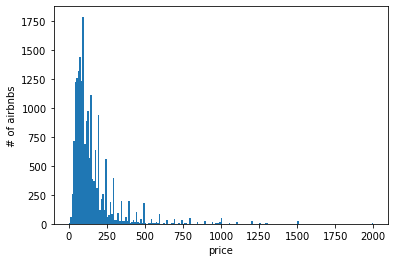

In [22]:
plt.hist(train['price'], bins = 200)
plt.xlabel('price')
plt.ylabel('# of airbnbs')
plt.show()

Text(0.5, 1.0, 'correlation between price and reviews')

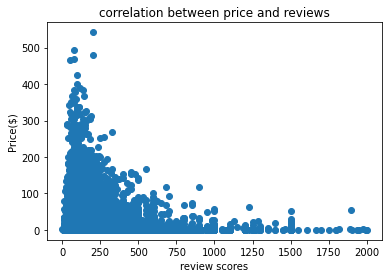

In [23]:
plt.scatter(train['price'], train['number_of_reviews'])
plt.xlabel('review scores')
plt.ylabel('Price($)')
plt.title('correlation between price and reviews')

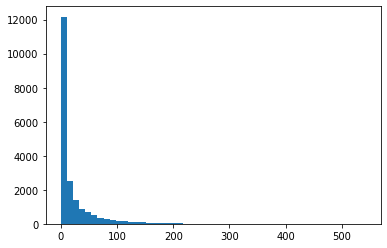

In [24]:
plt.hist(train['number_of_reviews'], bins = 50)
plt.show()

# Model

## Splitting

The goal with this model is for someone that rents out airbnbs to be able to input values and recieve the optimal price for their airbnb. Must use NLP. Inputs will include strings. For example the airbnb owner can type out the description and see how it affects the price. 

Must process description and amenities columns using nlp and then pass the vectorized tokens into our predictive model

In [25]:
train = train.dropna()
test = test.dropna()

In [26]:
# Splitting training data into our feature matrix and target vector
target = train['price']

# New Dataset for just our numeric data
X = train.drop(['price', 'amenities', 'description'], axis = 1)
y = target

X_test = test.drop(['amenities', 'description'], axis = 1)

# Turns X and y into all floats for NN model
X = X.astype(float)
y = y.astype(float)
X_test = X_test.astype(float)

## Preprocessing Steps




### Creates BOW (first inputs to model) for train and test

In [27]:
# Pulls out the description and amenities column for NLP processing 
desc_train = train['description'].astype(str)
desc_test = test['description'].astype(str)
amen_train = train['amenities'].astype(str)
amen_test = test['amenities'].astype(str)

If we want to increase model accuracy we can add the below code to the neural net

In [28]:
#Creates tokenizer for NlP model for the Amenities and Description features
# 
vocab_size = 10000
tokenize = keras.preprocessing.text.Tokenizer(num_words=10000, char_level = False)
tokenize.fit_on_texts(desc_train)
tokenize.fit_on_texts(desc_test)         
tokenize.fit_on_texts(amen_train)
tokenize.fit_on_texts(amen_test)

In [29]:
desc_train

0        Beautiful, sunlit brownstone 1-bedroom in the ...
1        Enjoy travelling during your stay in Manhattan...
2        The Oasis comes complete with a full backyard ...
3        This light-filled home-away-from-home is super...
4        Cool, cozy, and comfortable studio located in ...
                               ...                        
19995    private master bed room suite with indoor toil...
19996    Brand new Hollywood listing in the middle of A...
19997    Luxury 2 bedroom apartment in Midtown Manhatta...
19998    The room is in a newly renovated first floor p...
19999    Room with tons of natural light, in a two bedr...
Name: description, Length: 19850, dtype: object

In [30]:
# Creates Bag of Words 
desc_bow_train = tokenize.texts_to_matrix(desc_train)
desc_bow_test = tokenize.texts_to_matrix(desc_test)
amen_bow_train = tokenize.texts_to_matrix(amen_train)
amen_bow_test = tokenize.texts_to_matrix(amen_test)

In [31]:
# Wide Feature 2: one-hot vector 
# Not sure if this is necessary for the model because their model applies this to a 
# column with one word instead of multiple

# encoder = LabelEncoder()
# encoder.fit(desc_train)
# encoder.fit(amen_train)
# desc_train_encode = encoder.transform(desc_train)
# amen_train_encode = encoder.transfrom(amen_train)

# variety_test = encoder.transform(desc_test)

# num_classes_desc = np.max(desc_train) + 1
# num_classes_amen = np.max(amen_train) + 1


# Convert labels to one hot

# variety_train_desc = keras.utils.to_categorical(desc_train, num_classes_desc)
# variety_train_amen = keras.utils.to_categorical(amen_train, num_classes_amen)
# variety_test = keras.utils.to_categorical(desc_test, num_classes)

the 4 code cells below might be useful to create pipeline to process the users inputs. Currently I am just going to work on getting a working model, then i will come back to try to make a model that will take the users inputs and processes the text data. 

In [32]:
# vect = CountVectorizer(analyzer = 'word', stop_words = 'english')
# vect.fit_transform(desc_train)

In [33]:
# vect.get_feature_names()

In [34]:
# pipeline = make_pipeline(train_embed = tokenize.text_to_sequences(desc_train),
#                         test_embed = )

#### Matrix input for description 

In [35]:
# This Is equivalent to variety_test/train
desc_test.head()

0    Close to SM beaches, 3rd Street Promenade, SM ...
1    This apartment will give you a true (luxury) B...
2    Spacious 1 bedroom apartment apartment with se...
3    Very clean 1 Bedroom Jr. 3/4 Bath unit located...
4    My apartment is airy & light, brand new renova...
Name: description, dtype: object

In [36]:
desc_train.head()

0    Beautiful, sunlit brownstone 1-bedroom in the ...
1    Enjoy travelling during your stay in Manhattan...
2    The Oasis comes complete with a full backyard ...
3    This light-filled home-away-from-home is super...
4    Cool, cozy, and comfortable studio located in ...
Name: description, dtype: object

### Sequence Embeddings (second input to model)

In [37]:
# Turns the tokenized description text into sequences 
train_desc_embed = tokenize.texts_to_sequences(desc_train)
test_desc_embed = tokenize.texts_to_sequences(desc_test)

max_seq_length = 170

# Train preprocessing for description
train_desc_embed = keras.preprocessing.sequence.pad_sequences(
train_desc_embed, maxlen = max_seq_length, padding = 'post')

# Test preprocessing for description
test_desc_embed = keras.preprocessing.sequence.pad_sequences(
test_desc_embed, maxlen = max_seq_length, padding = 'post')

In [38]:
train_desc_embed

array([[ 123, 2656,  584, ...,    0,    0,    0],
       [ 150, 3090,  287, ...,    0,    0,    0],
       [   1,  901,  593, ...,    0,    0,    0],
       ...,
       [ 404,   44,   20, ...,    0,    0,    0],
       [   5,    3,  326, ...,  280,  440,  497],
       [  19,    8,  472, ...,    0,    0,    0]])

In [39]:
train_desc_embed.shape

(19850, 170)

### Amenities

In [40]:
# Turns the tokenized amenities text into sequences
train_amen_embed = tokenize.texts_to_sequences(amen_train)
test_amen_embed = tokenize.texts_to_sequences(amen_test)

max_seq_length = 170

train_amen_embed = keras.preprocessing.sequence.pad_sequences(
    train_amen_embed, maxlen = max_seq_length, padding = 'post')

test_amen_embed = keras.preprocessing.sequence.pad_sequences(
    test_amen_embed, maxlen = max_seq_length, padding = 'post')

In [41]:
train_amen_embed.shape

(19850, 170)

## Model

In [43]:
# Multiple Input Layers to be concatenated
feat_set_1 = layers.Input(shape = (vocab_size,))
feat_set_2 = layers.Input(shape = (vocab_size,))
# numeric_set = layers.Input(shape = (14,))

merged_layer1 = layers.Concatenate(axis = 1)([feat_set_1,
                                  feat_set_2])
#                                   numeric_set])
# Output layer
# variety_inputs = layers.Input(shape = (14,))

merged_layer = layers.Dense(256, activation = 'relu')(merged_layer1)

predictions = layers.Dense(1, activation = 'linear')(merged_layer)

wide_model = keras.Model(inputs = [feat_set_1,
                                   feat_set_2],
#                                    numeric_set],
                        outputs = predictions)

In [44]:
wide_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 20000)        0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          5120256     concatenate[0][0]     

In [45]:
wide_model.compile(loss = 'mean_squared_error',
                  optimizer = 'adam',
                  metrics = ['MeanAbsoluteError'])

In [46]:
#X_trainMod = [desc_train, amen_train] + [train_desc_embed, train_amen_embed]

In [47]:
# Deep model
deep_inputs = layers.Input(shape = (max_seq_length,))
numeric_set = layers.Input(shape = (14,))
embedding = layers.Embedding(vocab_size, 8, input_length = max_seq_length)(deep_inputs)
embedding = layers.Flatten()(embedding)
embed_out = layers.Dense(1)(embedding)
deep_model = keras.Model(inputs = [deep_inputs, numeric_set] , outputs = embed_out)
print(deep_model.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 170)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 170, 8)       80000       input_3[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 1360)         0           embedding[0][0]                  
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 14)]         0                                            
_______________________________________________________________________________________

In [48]:
deep_model.compile(loss = 'mse',
                  optimizer = 'adam',
                  metrics = ['MeanSquaredError'])

In [49]:
# Combine wide and deep model into one model
merged_out = layers.concatenate([wide_model.output, deep_model.output])
merged_out = layers.Dense(1)(merged_out)
combined_model = keras.Model(wide_model.input + [deep_model.input], merged_out)

print(combined_model.summary())

combined_model.compile(loss='mse',
                       optimizer='adam',
                       metrics=['MeanAbsoluteError'])

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 170)]        0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 20000)        0           input_1[0][0]                    
                                                                 input_2[0][0]         

In [50]:
# combined_model.

In [51]:
#[desc_bow_train, amen_bow_train] + [train_desc_embed, train_amen_embed] + [X]
combined_model.fit([desc_bow_train, amen_bow_train] + [train_desc_embed, train_amen_embed] + [X],
                    y,
                    epochs = 20,
                   batch_size = 128)

Epoch 1/20
156/156 [==============================] - 5s 29ms/step - loss: 40581.0625 - mean_absolute_error: 122.1254
Epoch 2/20
156/156 [==============================] - 4s 28ms/step - loss: 26202.5859 - mean_absolute_error: 91.3134
Epoch 3/20
156/156 [==============================] - 4s 28ms/step - loss: 23178.7539 - mean_absolute_error: 84.9254
Epoch 4/20
156/156 [==============================] - 5s 29ms/step - loss: 20858.0312 - mean_absolute_error: 78.4526
Epoch 5/20
156/156 [==============================] - 5s 30ms/step - loss: 19300.4473 - mean_absolute_error: 75.8998
Epoch 6/20
156/156 [==============================] - 5s 29ms/step - loss: 18166.2656 - mean_absolute_error: 74.7745
Epoch 7/20
156/156 [==============================] - 4s 29ms/step - loss: 17083.7637 - mean_absolute_error: 72.5075
Epoch 8/20
156/156 [==============================] - 4s 28ms/step - loss: 15897.7061 - mean_absolute_error: 68.7985
Epoch 9/20
156/156 [==============================] - 4s 28ms/s

In [52]:
combined_model.predict([desc_bow_test, amen_bow_test] + [test_desc_embed, test_amen_embed] + [X_test])

array([[ 69.872375],
       [147.56064 ],
       [141.30423 ],
       ...,
       [104.153015],
       [ 49.422306],
       [113.72507 ]], dtype=float32)

#### Save model via Keras API

In [53]:
print(desc_bow_test.shape)
print(amen_bow_test.shape)
print(test_desc_embed.shape)
print(test_amen_embed.shape)
print(X_test.shape)

(14893, 10000)
(14893, 10000)
(14893, 170)
(14893, 170)
(14893, 14)


In [54]:
combined_model.save('./AirBnB-Predictor')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./AirBnB-Predictor\assets


In [55]:
reconstructed_model = keras.models.load_model('./AirBnB-Predictor')

In [56]:
reconstructed_model.predict(([desc_bow_test, amen_bow_test] + [test_desc_embed] + [X_test]))

array([[ 69.872375],
       [147.56064 ],
       [141.30423 ],
       ...,
       [104.153015],
       [ 49.422306],
       [113.72507 ]], dtype=float32)

In [57]:
np.asarray([desc_bow_test, amen_bow_test] + [test_desc_embed] + [X_test]).shape

(4,)

## Functions for preprocessing

In [58]:
# Apply to description and amenities features
def bow(data):
    bow = data
    vocab_size = 10000
    tokenize = keras.preprocessing.text.Tokenizer(num_words=10000, char_level = False)
    tokenize.fit_on_texts(bow)
    bow = tokenize.texts_to_matrix(bow)
    return bow

In [59]:
# Apply to description and amenities features
def seq_embed(data):
    seq = data
    seq = tokenize.texts_to_sequences(seq)
    
    max_seq_length = 170
    
    seq = keras.preprocessing.sequence.pad_sequences(
    seq, maxlen = max_seq_length, padding = 'post')
    
    return seq

In [60]:
X1 = bow(test['description'][2])
X2 = bow(test['amenities'][2])

In [61]:
Y1 = seq_embed(test['description'][2])
Y2 = seq_embed(test['amenities'][2])

In [62]:
X1.shape
print(X2.shape)

(224, 10000)


In [64]:
print(X2.shape)
print(X1.shape)
print(Y1.shape)
print(Y2.shape)


(224, 10000)
(462, 10000)
(462, 170)
(224, 170)


In [65]:
Z = X_test[19:20]

In [66]:
Z = np.asarray(Z).astype('float32')

In [67]:
Z.shape

(1, 14)

In [ ]:
Z = pd.DataFrame(Z)

In [ ]:
# X1 = X1.reshape(1, -1)
# X2 = X2.reshape(1, -1)
# Y1 = Y1.reshape(1, -1)
# Y2 = Y2.reshape(1, -1)
# Z = Z.reshape(1, -1)

In [ ]:
X1


In [ ]:
X2.shape

In [ ]:
combined_model.predict(([X1, X2] + [Y1, Y2] + [Z]))

In [ ]:
# Apply to all other features of the dataset
def encode(df):
    df = df.astype('category')
    cat_columns = df.select_dtypes(['category']).columns
    cat_columns

    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
# Model for just the numeric data
model = keras.Sequential()

model.add(Dense(256,
                input_dim = 14,
                activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss='mse',
                       optimizer='adam',
                       metrics=['MeanAbsoluteError'])

In [ ]:
model.summary()

In [ ]:
model.fit(X,                   
          y,
          epochs = 30,
          batch_size = 32)

In [ ]:
model.predict(X_test[20:21])

In [ ]:
pca = PCA(n_components = 2)
X1 = pca.fit(X1)
X2 = pca.fit(X2)
Y1 = pca.fit(Y1)
Y2 = pca.fit(Y2)
# pca.fit(Z)

In [ ]:
X1.n_features_